# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

# Project
## Bestseller Books Analysis 

In [3]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\bestsellers with categories.csv")

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [6]:
df.shape

(550, 7)

# Data Handling & Cleaning

In [7]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [8]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

## EDA & Visualization

### Books that are rated 4.5 or above 

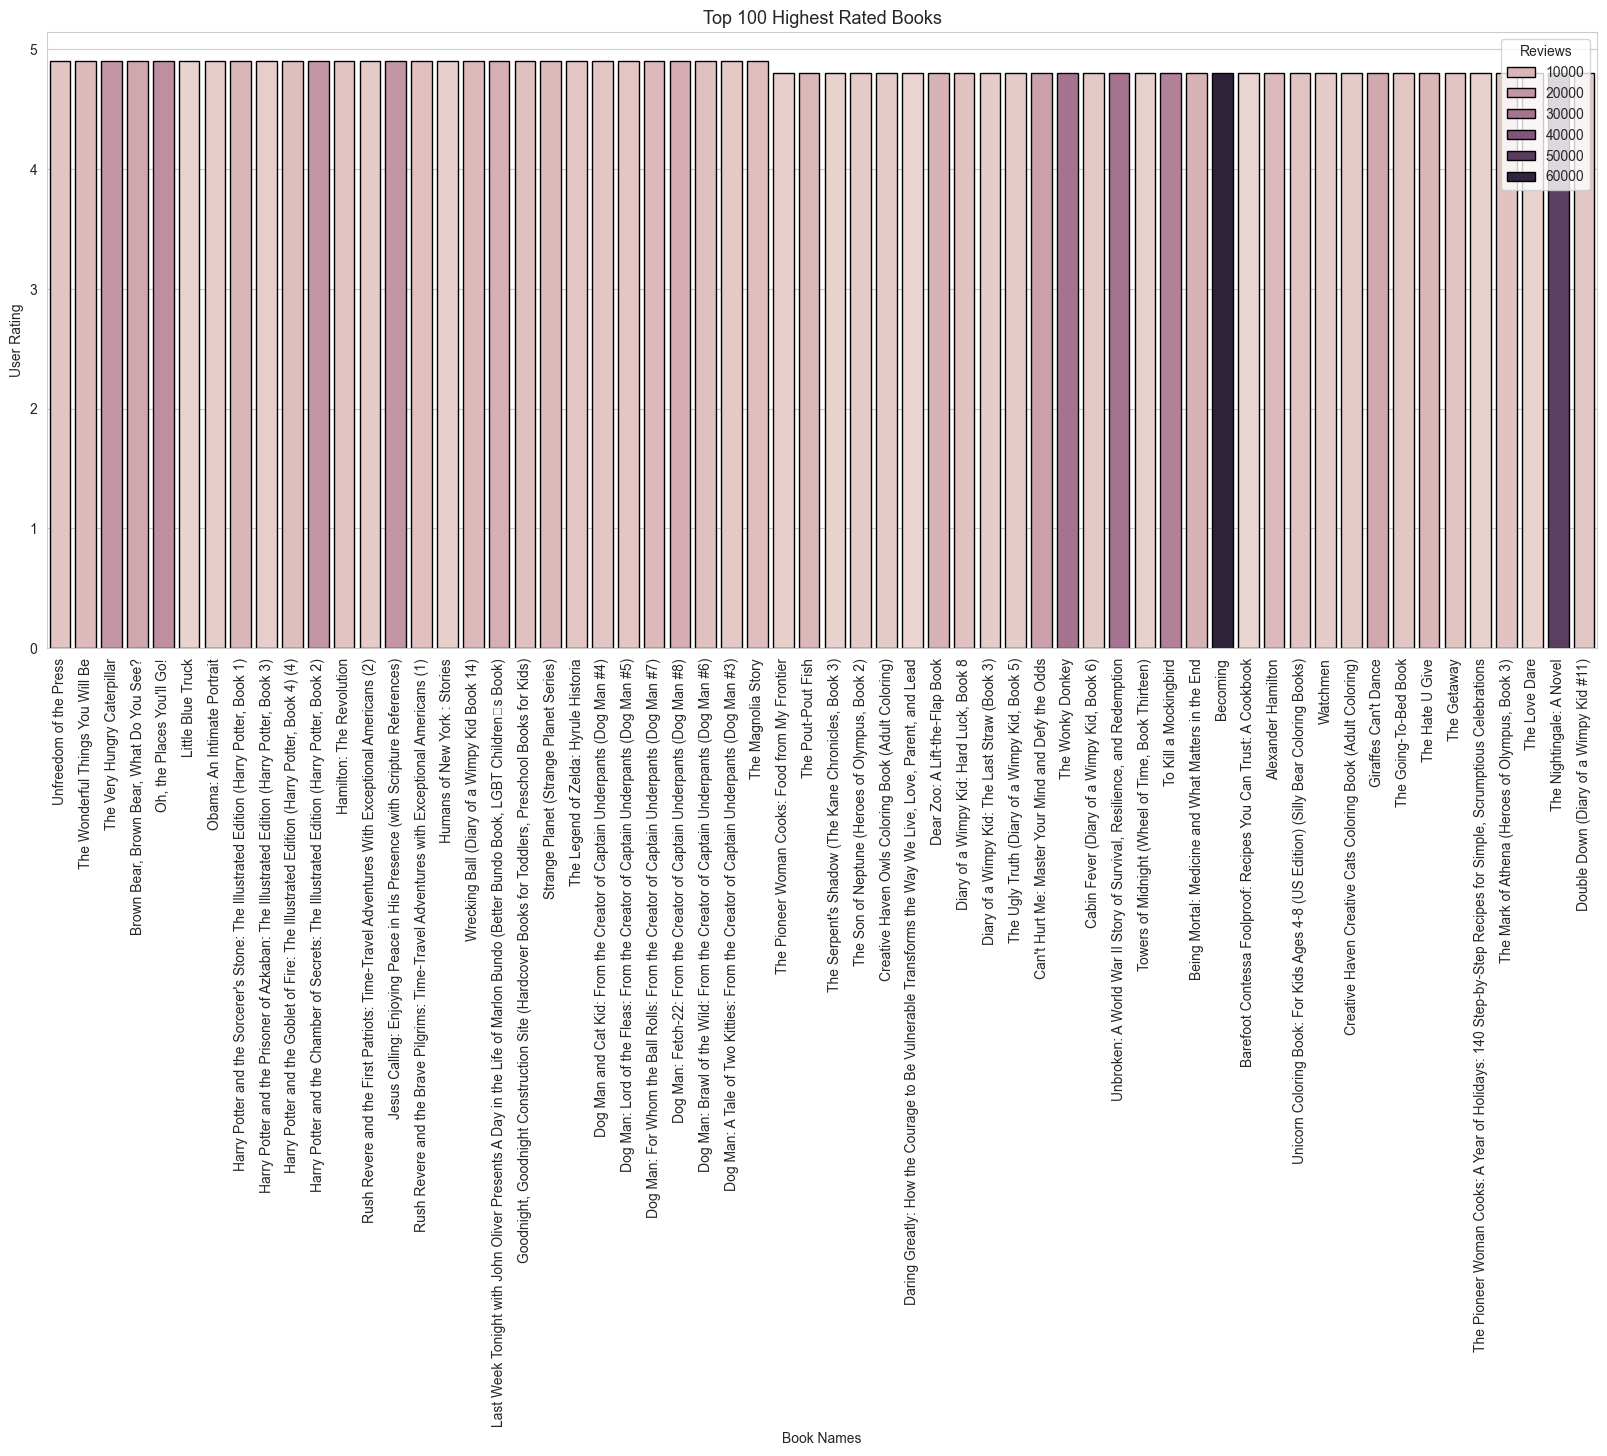

In [9]:
filtered_df = df[df["User Rating"] >= 4.5]
top100=filtered_df.sort_values("User Rating",ascending=False).head(100)
plt.figure(figsize=(20,8))
sns.set_style("whitegrid")
sns.barplot(data=top100,x="Name",y="User Rating",hue="Reviews",edgecolor="black")
plt.xticks(rotation=90)
plt.xlabel("Book Names")
plt.title("Top 100 Highest Rated Books",fontsize=13)
plt.show()

### Top 50 Author whose book got the highest reviews

In [10]:
classifi_au=df.groupby("Author")["Reviews"].sum().sort_values(ascending=False).reset_index()
classifi_aut=classifi_au.head(50)
fig=px.bar(classifi_aut,x="Author",y="Reviews",title="Top 50 Author whose book got the highest reviews")
fig.show()

### Average And Highest Reviewed Genre Classification

In [11]:
classifi_gen=df.groupby("Genre").agg({
    "User Rating":"mean",
    "Reviews":"sum"
}).reset_index()
stbar=classifi_gen.style.background_gradient(cmap="Blues")
stbar

,Genre,User Rating,Reviews
0,Fiction,4.648333,3764110
1,Non Fiction,4.595161,2810195


In [12]:
fig=px.bar(classifi_gen,x="Genre",y="Reviews",color="User Rating",color_continuous_scale="Viridis",title="Average User Rating And Highest Reviews Per Genres")
fig.show()

### Top 50 Highest Price Books

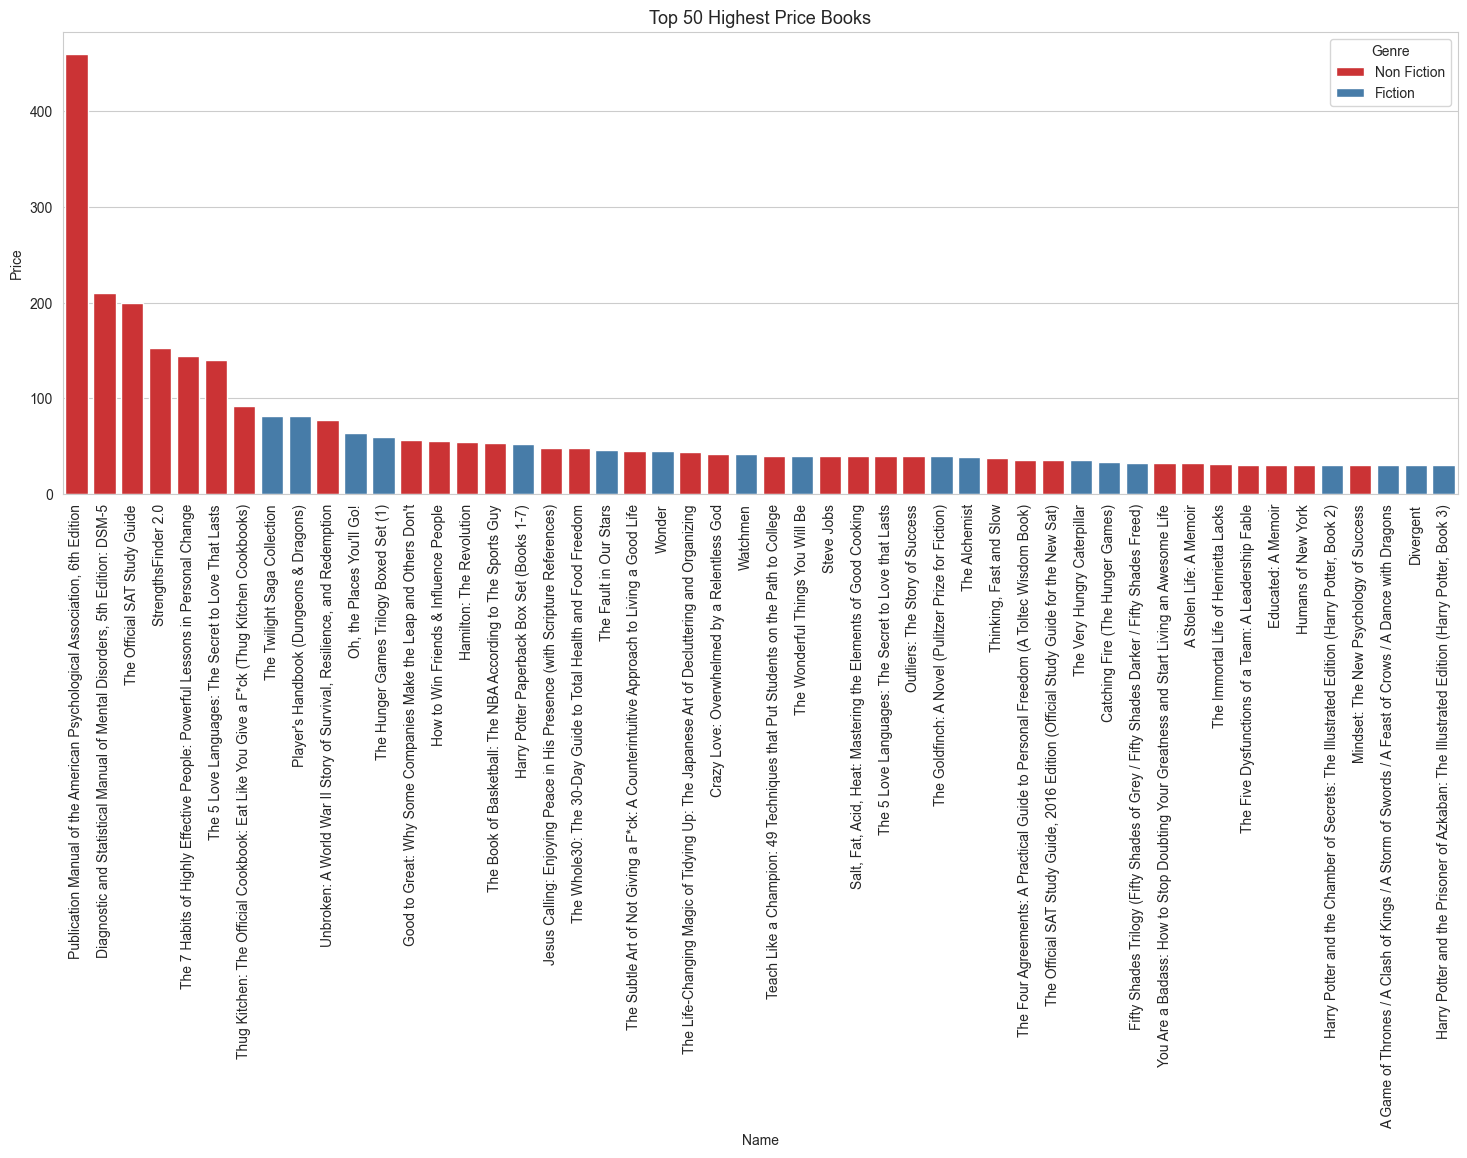

In [13]:
classifi_pr=df.groupby(["Name","Genre"])["Price"].sum().sort_values(ascending=False).reset_index()
classifi_price=classifi_pr.head(50)
classifi_price
plt.figure(figsize=(18,6))
sns.barplot(data=classifi_price,x="Name",y="Price",hue="Genre",palette="Set1")
plt.xticks(rotation=90)
plt.title("Top 50 Highest Price Books",fontsize=13)
plt.show()

### Books that are published before and after year 2014

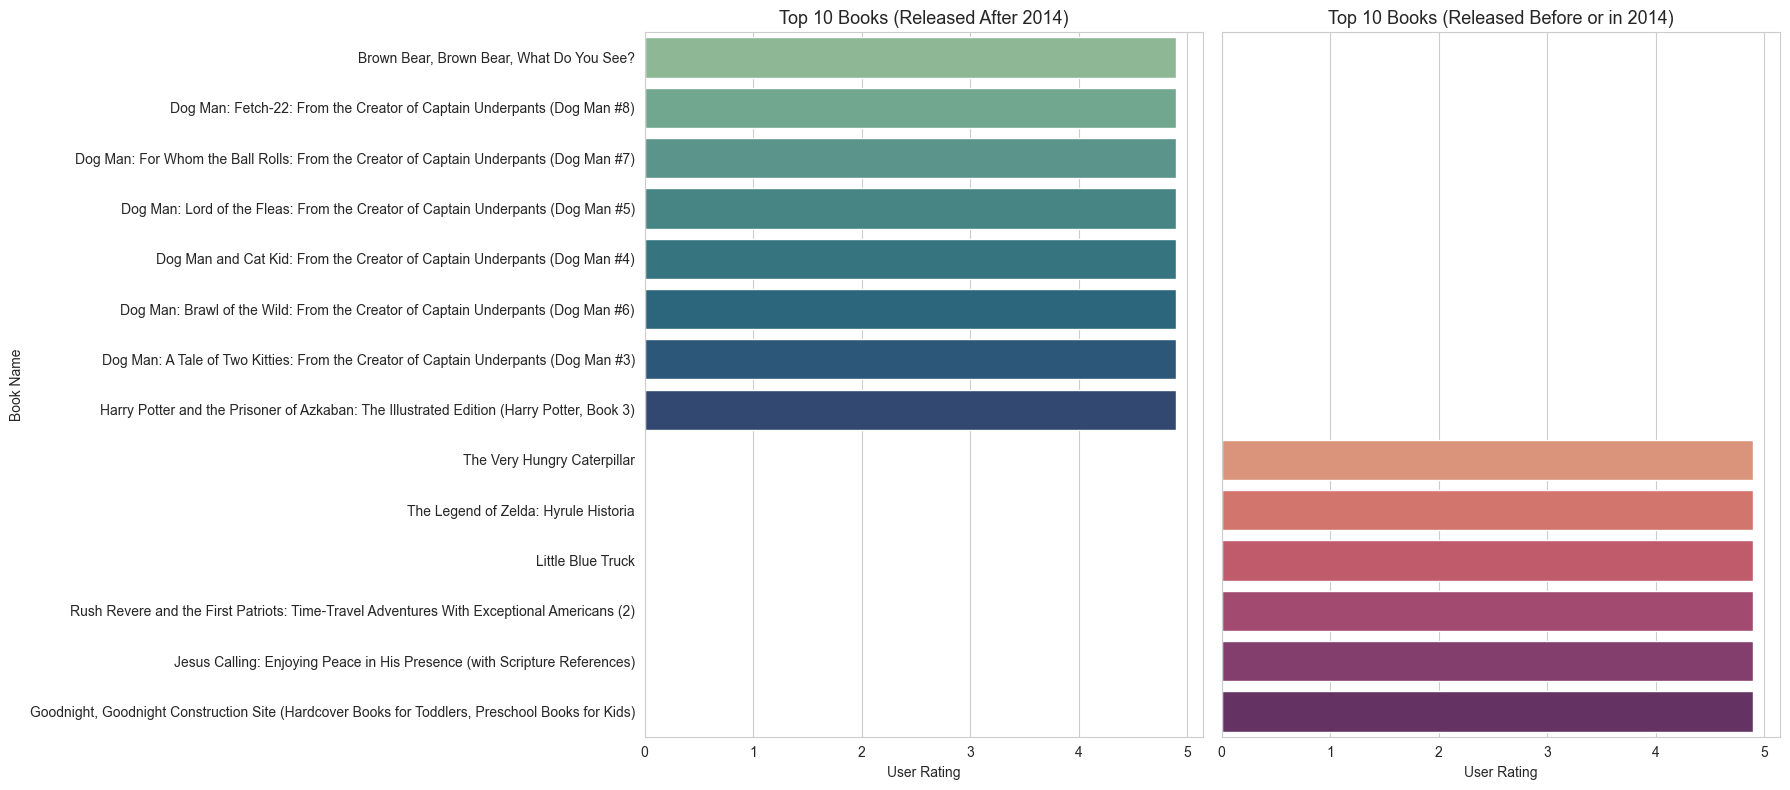

In [14]:
after_2014 = df[df["Year"] > 2014]
before_2014 = df[df["Year"] <= 2014]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharey=True)

# Books after 2014
sns.barplot(
    data=after_2014.sort_values("User Rating", ascending=False).head(10),
    x="User Rating",
    y="Name",
    ax=axes[0],
    palette="crest"
)
axes[0].set_title("Top 10 Books (Released After 2014)", fontsize=13)
axes[0].set_xlabel("User Rating")
axes[0].set_ylabel("Book Name")

# Books before or in 2014
sns.barplot(
    data=before_2014.sort_values("User Rating", ascending=False).head(10),
    x="User Rating",
    y="Name",
    ax=axes[1],
    palette="flare"
)
axes[1].set_title("Top 10 Books (Released Before or in 2014)", fontsize=13)
axes[1].set_xlabel("User Rating")
axes[1].set_ylabel("")

# Final layout
plt.tight_layout()
plt.show()


In [15]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


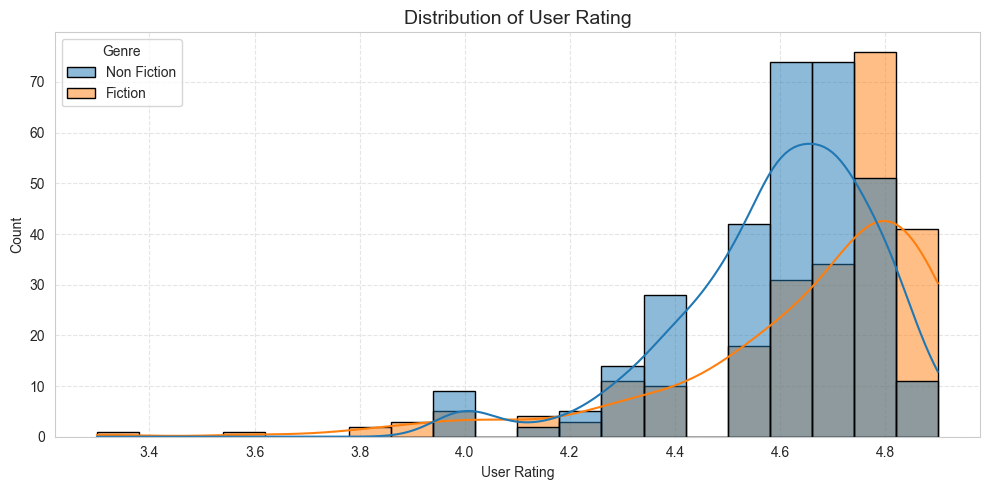

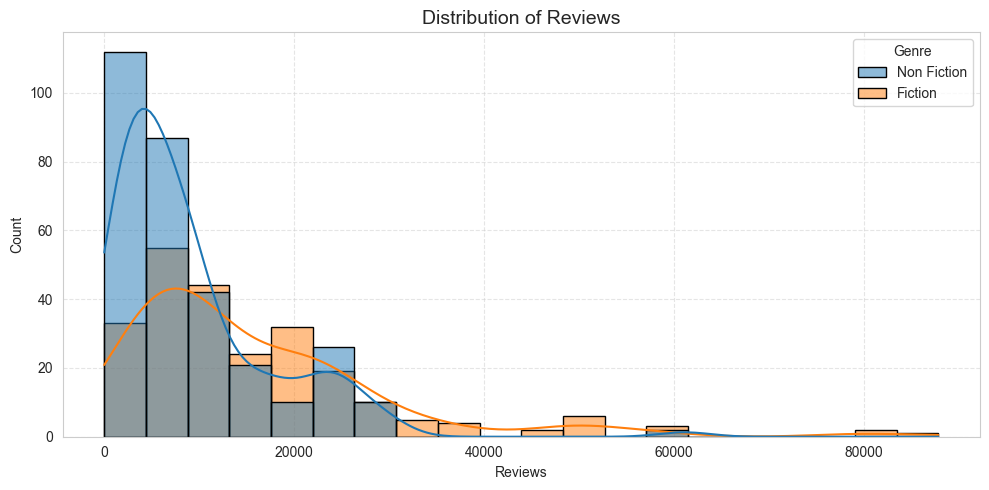

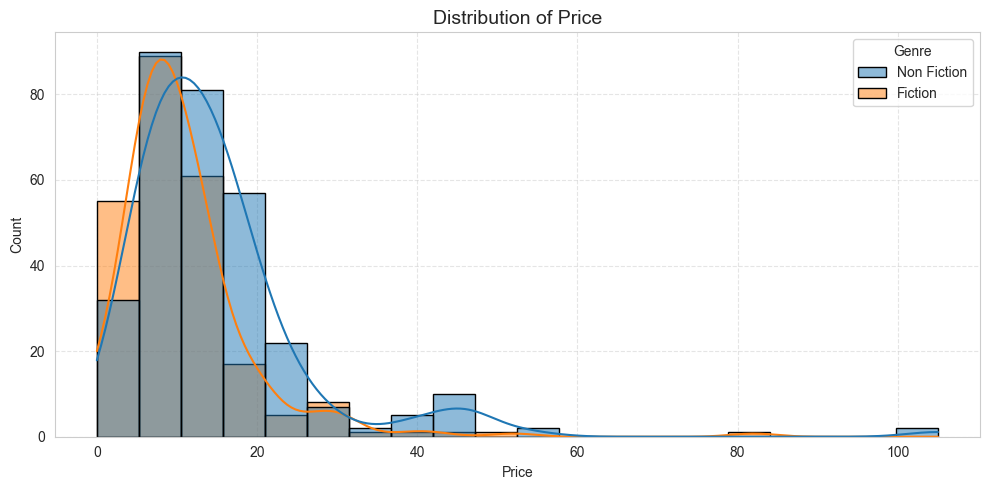

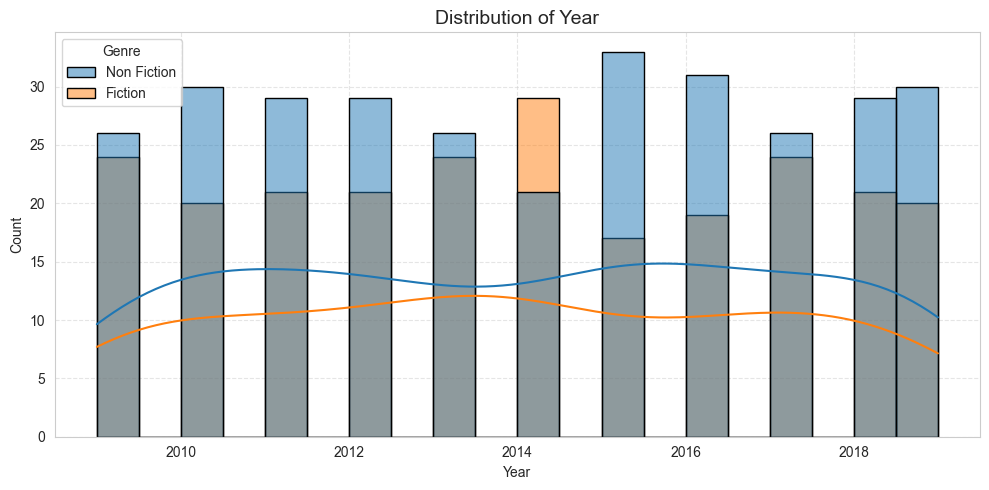

In [16]:
# Plot distribution for only numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, hue="Genre", kde=True, edgecolor="black", bins=20)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


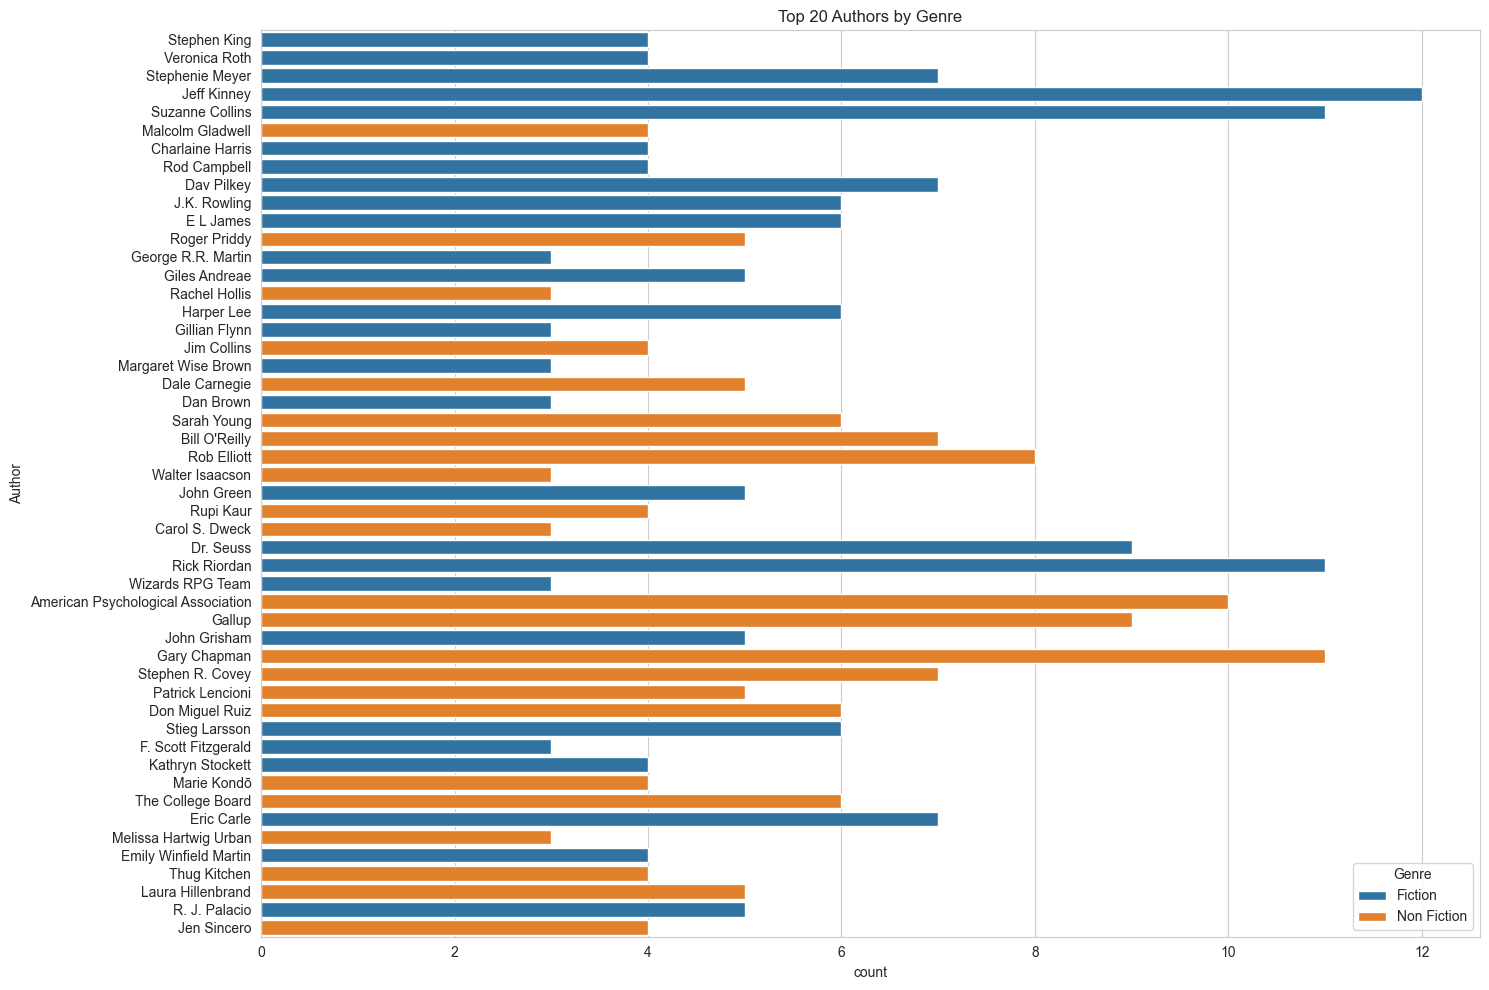

In [17]:
# Top 20 most common authors by genre
top_authors = df["Author"].value_counts().head(50).index
plt.figure(figsize=(15,10))
sns.countplot(data=df[df["Author"].isin(top_authors)], y="Author", hue="Genre")
plt.title("Top 20 Authors by Genre")
plt.tight_layout()
plt.show()


### Correlatrion Heatmap

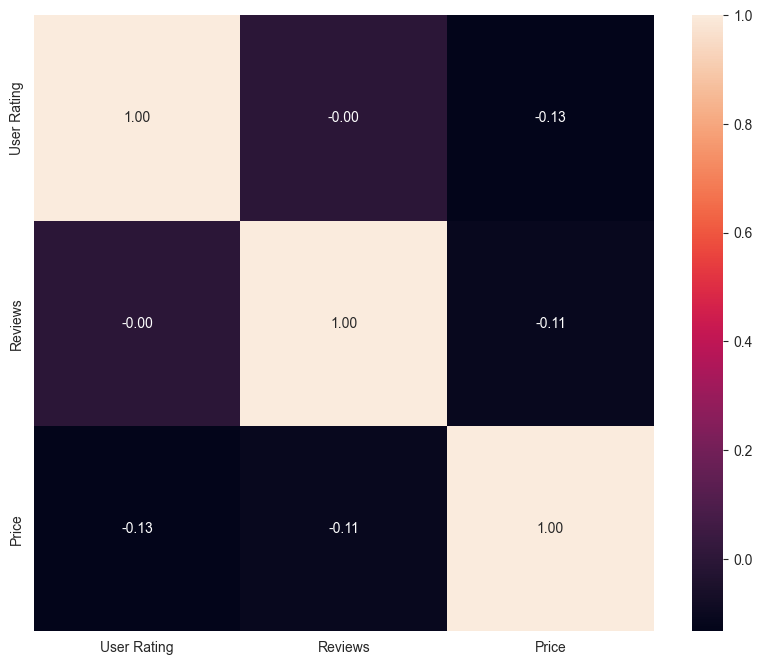

In [18]:
dfx=df.drop(columns=["Year"]).select_dtypes(include="number").corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=dfx,annot=True,fmt=".2f")
plt.show()

## Machine Learning Classification: Predicting High User Rating

In [ ]:
df["High_Rating"] = (df["User Rating"] >= 4.5).astype(int)

# Select features and target
features = df[["Price", "Reviews", "Year"]]
features = pd.get_dummies(features.join(df["Genre"]), drop_first=True)
target = df["High_Rating"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5 16]
 [ 4 85]]
              precision    recall  f1-score   support

           0       0.56      0.24      0.33        21
           1       0.84      0.96      0.89        89

    accuracy                           0.82       110
   macro avg       0.70      0.60      0.61       110
weighted avg       0.79      0.82      0.79       110

